# Split dataset in
train, validation and test sets



|  | Train |  Val  |  Test |
|---|  ---  |  ---  |  ---  |
| A |   70  |  15   |   15  |  
| B |   80  |  10   |   10  |



In [1]:
from tqdm.notebook import tqdm_notebook as tqdm
from pathlib import Path
import pandas as pd 
tqdm.pandas()

## Load data

In [2]:
# Path to labeled sequences
PATH_DATA = Path('/home/jorge/AlgoLab/Tezi-Marzi/Tezi-Documentation/Master Thesis-20210607T163207Z-001/Master Thesis/Archive')

In [3]:
# Path to save the generated data
PATH_SAVE = Path("data")
PATH_SAVE.mkdir(exist_ok=True)

In [4]:
# Load data
data = pd.read_csv(PATH_DATA.joinpath('Sequences_chr1_unique.csv'))
data.head()

,Sequences,Splice_Junctions
0,TCTGTCCTGTAAACCAGGACCCAGGTTATGCCTCTGCGAGCAGAGC...,1
1,TTTTTCTTCCTTCACTCTGAAGCCTGTTTACTTTGTTCTTCTGGCC...,1
2,TCCCGCCAAATCCGAAGCCTTGCTTCCTCCGGGAAAAGAGTCTTTT...,1
3,ATAATGATATTACTTGTACATAGAGTATAACTCCAGATTCCTTGGT...,1
4,TTTTTTTCCCTAATCCATCAAAGACTCCATAGCATAGTCGTTAATA...,0


In [5]:
data.describe()

,Splice_Junctions
count,72168.000000
mean,0.500000
std,0.500003
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72168 entries, 0 to 72167
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sequences         72168 non-null  object
 1   Splice_Junctions  72168 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


## Summary on data

In [7]:
from collections import Counter

In [8]:
# Representativity of each lable
count_labels = Counter(data.Splice_Junctions.tolist())
count_labels

Counter({1: 36084, 0: 36084})

  0%|          | 0/72168 [00:00<?, ?it/s]

<AxesSubplot:>

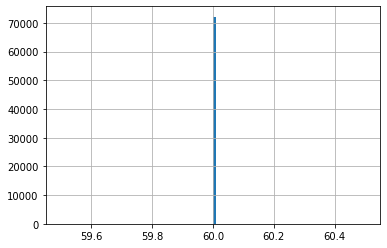

In [9]:
# len of each sequence
import matplotlib.pyplot as plt

# Compute the len of each sequence in the dataset
len_sequences = data.Sequences.progress_apply(len)
len_sequences.hist(bins=100)

## Select `Train`, `Val` and `Test`sets

In [10]:
from src import DataSelector

# the id for each sequence will be define by the row in the csv file
id_labels = data.index.tolist()

# labels are in the column 'Splice_Junctions' 
labels = data.Splice_Junctions.tolist()

In [11]:
# Instantiate DataSelector with list of labels and id for each sequence 
ds = DataSelector(
    id_labels,
    labels   , # list with labels 
    seed = 42, # reproducibility of random selection
)

In [12]:
ds(train_size=0.7)

Generating train, validation and test sets...
Datasets successfully generated. See 'datasets' attribute.
{'train': {1: 25373, 0: 25143}, 'val': {1: 5385, 0: 5441}, 'test': {0: 5500, 1: 5326}}


In [13]:
import json

with open(PATH_SAVE.joinpath("datasets.json"), "w", encoding="utf8") as fp: 
    json.dump(ds.datasets, fp, ensure_ascii=False, indent=4)